Clone ollama related file from github

In [ ]:
!git clone https://github.com/greatsangho/teddyollama.git
!cp /content/teddyollama/ollama/Modelfile /content/Modelfile

Cloning into 'teddyollama'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 35 (delta 8), reused 35 (delta 8), pack-reused 0 (from 0)
Receiving objects: 100% (35/35), 10.69 KiB | 2.14 MiB/s, done.
Resolving deltas: 100% (8/8), done.


install ollama

In [ ]:
!curl -fsSL https://ollama.com/install.sh -o install.sh
!bash install.sh

>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
############################################################################################# 100.0%
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


start ollama at background

In [ ]:
!nohup ollama serve &

nohup: appending output to 'nohup.out'


check ollama is started

In [ ]:
!ollama --version

ollama version is 0.5.7


install ngrok

In [ ]:
!pip install pyngrok

add ngrok token

In [ ]:
!ngrok config add-authtoken 2oN92Ew0vw9EX82szhzNVjM3B46_5CSFU8WkFLmixo9JsQXws

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
# !nohup ngrok http --subdomain=termite-upward-monthly.ngrok-free.app 8000

check port 8000 is using

In [ ]:
!lsof -i :8000

In [ ]:
!huggingface-cli download heegyu/EEVE-Korean-Instruct-10.8B-v1.0-GGUF ggml-model-Q5_K_M.gguf --local-dir /content --local-dir-use-symlinks False

/usr/local/lib/python3.11/dist-packages/huggingface_hub/commands/download.py:139: FutureWarning: Ignoring --local-dir-use-symlinks. Downloading to a local directory does not use symlinks anymore.
  warnings.warn(
ggml-model-Q5_K_M.gguf: 100% 7.65G/7.65G [03:01<00:00, 42.1MB/s]
Download complete. Moving file to /content/ggml-model-Q5_K_M.gguf
/content/ggml-model-Q5_K_M.gguf


check gguf file is related with Modelfile

In [ ]:
!ls

ggml-model-Q5_K_M.gguf	install.sh  Modelfile  nohup.out  sample_data  teddyollama


create ollama image

In [ ]:
!ollama create EEVE-Korean-10.8B -f Modelfile

gathering model components ⠙ gathering model components ⠹ gathering model components ⠸ gathering model components ⠼ gathering model components ⠴ gathering model components ⠦ gathering model components ⠧ gathering model components ⠇ gathering model components ⠏ gathering model components ⠋ gathering model components ⠙ gathering model components ⠹ gathering model components ⠸ gathering model components ⠼ gathering model components ⠴ gathering model components ⠴ gathering model components ⠧ gathering model components ⠇ gathering model components ⠏ gathering model components ⠋ gathering model components ⠙ gathering model components ⠹ gathering model components ⠸ gathering model components ⠼ gathering model components ⠴ gathering model components ⠴ gathering model components ⠧ gathering model components ⠇ gathering model components ⠏ gathering model components ⠋ gathering model components ⠙ gathering model components ⠹ gathering model components ⠸ gathering model components ⠼ gathering mode

check model is installed to ollama

In [ ]:
!ollama list

NAME                        ID              SIZE      MODIFIED               
EEVE-Korean-10.8B:latest    c90c42661e86    7.7 GB    Less than a second ago    


In [ ]:
# !pip install colab-xterm
# %load_ext colabxterm
# %xterm

check nvidia gpu is available

In [ ]:
!nvidia-smi

Fri Feb  7 00:33:02 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   42C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

can use faiss-gpu-cu12 for CUDA Version: 12.4

use faiss-cpu for cpu

In [ ]:
!pip install faiss-gpu-cu12

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 MB 11.3 MB/s eta 0:00:00


In [ ]:
!pip install langserve langchain-ollama
!pip install python-dotenv
!pip install sse_starlette
!pip install --upgrade httpx fastapi uvicorn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.0/96.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: anyio
    Found existing installation: anyio 3.7.1
    Uninstalling anyio-3.7.1:
      Successfully uninstalled anyio-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-server 1.24.0 requires anyio<4,>=3.1.0, but you have anyio 4.8.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.3 MB/s eta 0:00:00


start ngrok

In [ ]:
from pyngrok import ngrok
import threading

def start_ngrok():
  public_url = ngrok.connect(8000, hostname="termite-upward-monthly.ngrok-free.app")
  print(f"Public URL: {public_url}")

# 백그라운드에서 실행
ngrok_thread = threading.Thread(target=start_ngrok, daemon=True)
ngrok_thread.start()

start LLM server

In [ ]:
!cd teddyollama/ollama/fastapi && python3 server.py

Public URL: NgrokTunnel: "https://termite-upward-monthly.ngrok-free.app" -> "http://localhost:8000"
INFO:     Started server process [2168]
INFO:     Waiting for application startup.

     __          ___      .__   __.   _______      _______. _______ .______     ____    ____  _______
    |  |        /   \     |  \ |  |  /  _____|    /       ||   ____||   _  \    \   \  /   / |   ____|
    |  |       /  ^  \    |   \|  | |  |  __     |   (----`|  |__   |  |_)  |    \   \/   /  |  |__
    |  |      /  /_\  \   |  . `  | |  | |_ |     \   \    |   __|  |      /      \      /   |   __|
    |  `----./  _____  \  |  |\   | |  |__| | .----)   |   |  |____ |  |\  \----.  \    /    |  |____
    |_______/__/     \__\ |__| \__|  \______| |_______/    |_______|| _| `._____|   \__/     |_______|
    
LANGSERVE: Playground for chain "/chat/" is live at:
LANGSERVE:  │
LANGSERVE:  └──> /chat/playground/
LANGSERVE:
LANGSERVE: Playground for chain "/translate/" is live at:
LANGSERVE:  │
LANGSERVE:  └──

INFO:     Shutting down
INFO:     Finished server process [2168]
ERROR:    Traceback (most recent call last):
  File "/usr/lib/python3.11/asyncio/runners.py", line 190, in run
    return runner.run(main)
           ^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/asyncio/runners.py", line 118, in run
    return self._loop.run_until_complete(task)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/asyncio/base_events.py", line 641, in run_until_complete
    self.run_forever()
  File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever
    self._run_once()
  File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once
    handle._run()
  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run
    self._context.run(self._callback, *self._args)
  File "/usr/local/lib/python3.11/dist-packages/uvicorn/server.py", line 69, in serve
    with self.capture_signals():
  File "/usr/lib/python3.11/contextlib.py", line 144, in __exit__
    n

T4 사용량

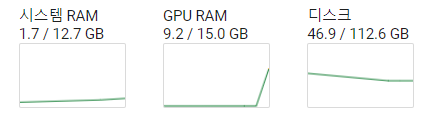